## Question 1 - Preprocessing 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the dataset and have a look at it
df = pd.read_csv('../Data/diabetes.csv')
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [3]:
# Step 2: Split the dataset into the explanatory variables (X) and the target variable (y)
X = df.drop('Outcome', axis=1) 
y = df['Outcome'] # y = diabetes.Outcome 
print(X.shape, y.shape)

(768, 8) (768,)


In [4]:
X.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1  

We can consider that all our variables are continuous (even Pregnancies to some extent), therefore Euclidean distance is appropriate for our k-NN model.

In [5]:
# Step 3: Perform a train-test split using 60% for the training set and 40% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.6, #test_size = 0.4
                                                    random_state=0)

In [6]:
# Step 4: Use MinMaxScaler to scale the data
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train) # NOT on the entirety 
X_train_mms = minmaxscaler.transform(X_train)
X_test_mms = minmaxscaler.transform(X_test)

In [9]:
minmaxscaler.data_min_

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.084, 21.   ])

In [10]:
minmaxscaler.data_max_

array([ 15.  , 198.  , 122.  ,  63.  , 846.  ,  67.1 ,   2.42,  81.  ])

In [12]:
pd.DataFrame(X_test_mms).describe()

,0,1,2,3,4,5,6,7
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.260823,0.599600,0.549846,0.313028,0.074790,0.470465,0.165978,0.200054
std,0.223700,0.156863,0.164876,0.262954,0.118638,0.116431,0.136106,0.194125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002568,0.000000
25%,0.066667,0.497475,0.508197,0.000000,0.000000,0.396423,0.070098,0.050000
50%,0.200000,0.570707,0.573770,0.333333,0.000000,0.470939,0.123716,0.133333
75%,0.400000,0.691919,0.639344,0.507937,0.118203,0.540984,0.234482,0.333333
max,1.133333,1.005051,0.934426,1.571429,0.803783,0.788376,0.774401,0.850000


In [7]:
# Step 5: Train a k-NN model with k=7 and compute the score on the training and test sets
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_mms, y_train)
knn.fit(X_train_mms, y_train)
print("Training : {}; Test : {}".format(knn.score(X_train_mms, y_train), knn.score(X_test_mms, y_test)))

Training : 0.7760869565217391; Test : 0.7435064935064936


In [8]:
# Let us try to do what we should NOT do
X_mms = minmaxscaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, stratify=y, train_size=0.6, random_state=0)

knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train, y_train)
print("Training : {}; Test : {}".format(knn2.score(X_train, y_train), knn2.score(X_test, y_test)))

Training : 0.808695652173913; Test : 0.724025974025974


The slightly better value for the test score indicates that there is some data leakage. The 2nd model "knows" some small amount of information from the test set.

## Question 2 – Curse of Dimensionality 

In [12]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
import seaborn as sns

import matplotlib.pyplot as plt

# part 1 : Generate 100 observations with 10,000 features distributed uniformly.
rnd = np.random.RandomState(seed=0)
X = rnd.uniform(size=(100, 10000))
X.shape

(100, 10000)

In [13]:
# part 2 : Select a subset of 2 features, compute all the pairwise distances between the 100  observations and plot the distribution of distances.
dists = pairwise_distances(X[:, :2]) # first two columns 
dists.shape

(100, 100)

<Axes: ylabel='Density'>

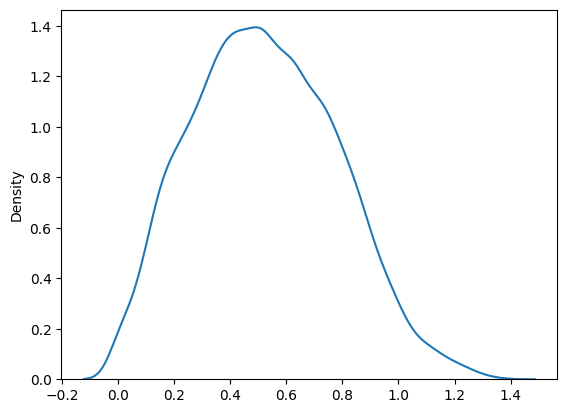

In [14]:
sns.kdeplot(dists.flatten())

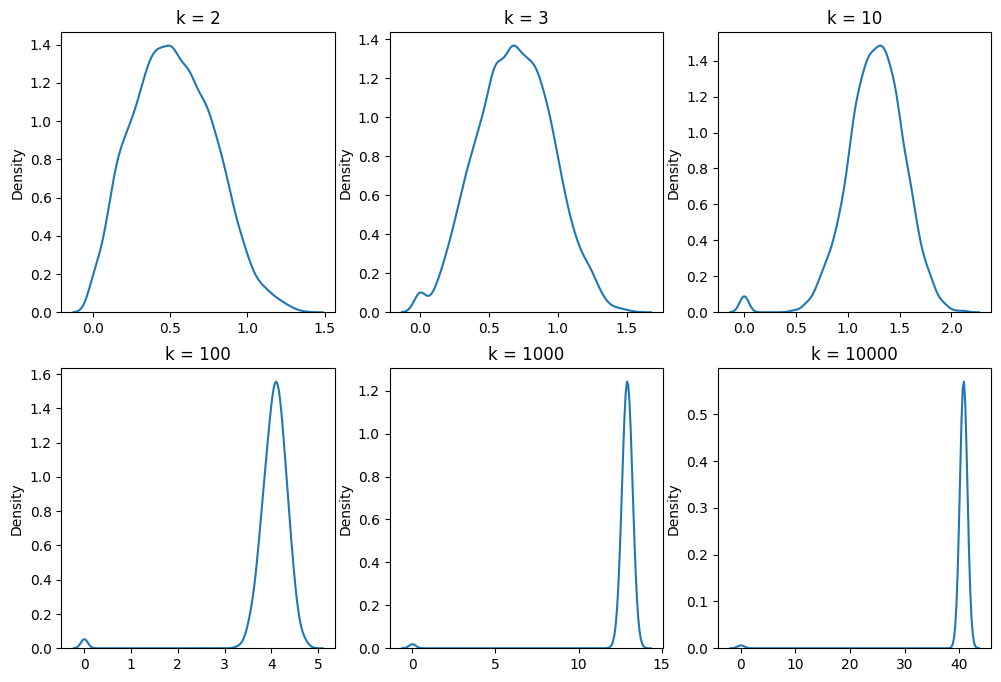

In [18]:
# part 3 : Perform the previous operation with 3, 10, 100, 1,000 and 10,000 features. Based on  the visual comparison of distance distributions, what is your conclusion about the  usefulness of distances (for example for k-NN)?
nbVar = [2, 3, 10, 100, 1000, 10000]
fig, sub = plt.subplots(2, 3, figsize=(12, 8)) # 2 rows, 3 columns
for k, ax in zip(nbVar, sub.flatten()):
    dists = pairwise_distances(X[:, :k])
    sns.kdeplot(dists.flatten(), ax=ax)
    ax.set_title("k = {}".format(k))

## Question 3 – Cross-validation and Parameter Tuning  

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=0)

# Define the parameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1','l2', None],
    'C': [0.1, 1, 10]
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0, max_iter=10000)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid)

# Fit the model
grid_search.fit(X_train, y_train)

# Explore the contents of the GridSearchCV object
print("Best Estimator:", grid_search.best_estimator_)
print("Best Score:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)
print("CV Results:", grid_search.cv_results_)
print("Refit Time:", grid_search.refit_time_)

# Save the model to a file
joblib.dump(grid_search.best_estimator_, 'log_reg_model.pkl')

# Load the model back from the file
loaded_model = joblib.load('log_reg_model.pkl')

# Test the loaded model
y_pred = loaded_model.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty

Best Estimator: LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=0,
                   solver='liblinear')
Best Score: 0.9707161125319693
Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
CV Results: {'mean_fit_time': array([2.81429291e-04, 1.11103058e-04, 4.25998211e-02, 1.59707546e-02,
       4.75277901e-02, 2.26020813e-03, 5.85845470e-02, 3.47214890e-01,
       1.72138214e-04, 1.15060806e-04, 1.00851059e-04, 1.67193794e-01,
       2.72539139e-02, 1.07093239e-01, 2.01582909e-03, 3.81505489e-02,
       3.35993814e-01, 1.54113770e-04, 1.15156174e-04, 1.11532211e-04,
       3.81159496e-01, 1.97566986e-02, 2.25742579e-01, 2.36320496e-03,
       3.65722179e-02, 3.38451624e-01, 1.26457214e-04]), 'std_fit_time': array([6.23533827e-05, 7.66359057e-06, 1.18433851e-02, 3.86614117e-03,
       1.70864855e-03, 9.31837341e-04, 2.61458612e-02, 1.67423726e-01,
       7.78349577e-05, 1.10268013e-05, 2.95100182e-06, 1.91893275e-02,
       1.93334831e-02, 2.10403735e-02,

## Question 4 – Pipelines 

In [21]:
boston = pd.read_csv('../Data/boston.csv')
boston.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2,1
91,0.03932,0.0,3.41,0,0.489,6.405,73.9,3.0921,2,270,17.8,393.55,8.20,22.0,1
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,384.07,14.79,30.7,1
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,1
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6,1
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8,1
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8,1
248,0.16439,22.0,5.86,0,0.431,6.433,49.1,7.8265,7,330,19.1,374.71,9.52,24.5,1
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4,1
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,1
